# Vorticity@850 60km-4x and Target precip 4x London

In [1]:
%reload_ext autoreload

%autoreload 2

import math
import os

import iris
import iris.analysis.cartography
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr

import ml_downscaling_emulator as mlde
from ml_downscaling_emulator.utils import cp_model_rotated_pole, platecarree, plot_grid

In [2]:
def open_split(dataset_name, split):
    return xr.open_dataset(os.path.join(os.getenv("MOOSE_DERIVED_DATA"), "nc-datasets", dataset_name, f"{split}.nc"))

In [3]:
dataset_name = "60km-2.2km-coarsened-4x_birmingham_vorticity850_random"
ds_splits = {split: open_split(dataset_name, split) for split in ["train", "val", "test"]}

In [4]:
ds_splits["train"]

<xarray.Dataset>
Dimensions:                     (time: 15120, bnds: 2, grid_latitude: 64,
                                 grid_longitude: 64)
Coordinates:
  * time                        (time) object 1980-12-01 12:00:00 ... 2080-11...
  * grid_latitude               (grid_latitude) float32 -2.49 -2.41 ... 2.55
  * grid_longitude              (grid_longitude) float32 357.9 358.0 ... 363.0
    pressure                    float32 ...
    season                      (time) int64 ...
Dimensions without coordinates: bnds
Data variables:
    rotated_latitude_longitude  (time) float64 ...
    time_bnds                   (time, bnds) object ...
    grid_latitude_bnds          (time, grid_latitude, bnds) float32 ...
    grid_longitude_bnds         (time, grid_longitude, bnds) float32 ...
    target_pr                   (time, grid_latitude, grid_longitude) float32 ...
    vorticity850                (time, grid_latitude, grid_longitude) float64 ...
Attributes:
    source:       Data from Met Office Unified Model
    Conventions:  CF-1.7

## Vorticity@850

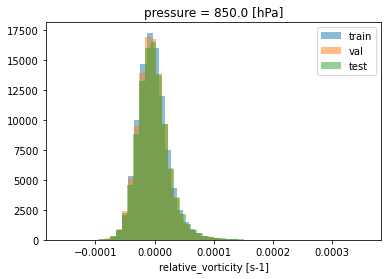

In [5]:
ax = plt.axes()
for split in ["train", "val", "test"]: 
    ds_splits[split]["vorticity850"].plot.hist(ax=ax, bins=50, density=True, alpha=0.5, label=split)

ax.legend()

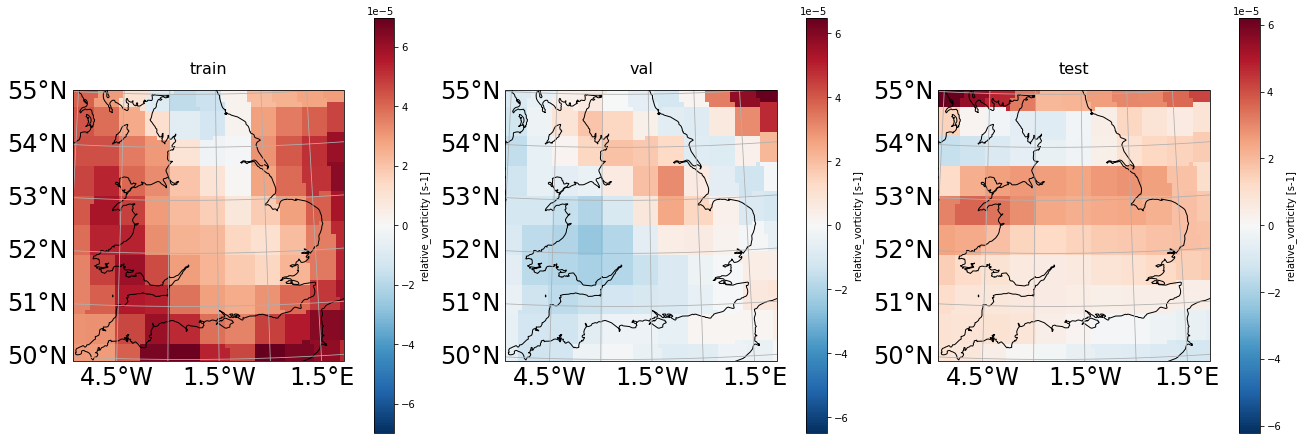

In [11]:
fig, axd = plt.subplot_mosaic([["train", "val", "test"]], figsize=(18, 6), constrained_layout=True, subplot_kw={'projection': cp_model_rotated_pole})
for split in ["train", "val", "test"]: 
    ax = axd[split]
    plot_grid(ds_splits[split]["vorticity850"].isel(time=0), ax=ax, center=0, add_colorbar=True, norm=None, cmap=None, title=split)

## Target pr

In [7]:
for split in ["train", "val", "test"]: 
    ds_splits[split]["target_pr"] = ds_splits[split]["target_pr"]*3600*24

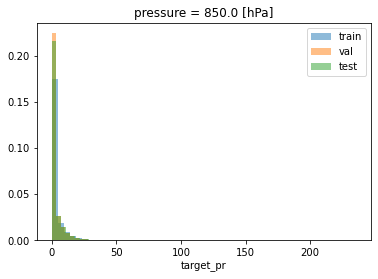

In [8]:
ax = plt.axes()
for split in ["train", "val", "test"]: 
    ds_splits[split]["target_pr"].plot.hist(bins=50, density=True, alpha=0.5, label=split)
ax.legend()

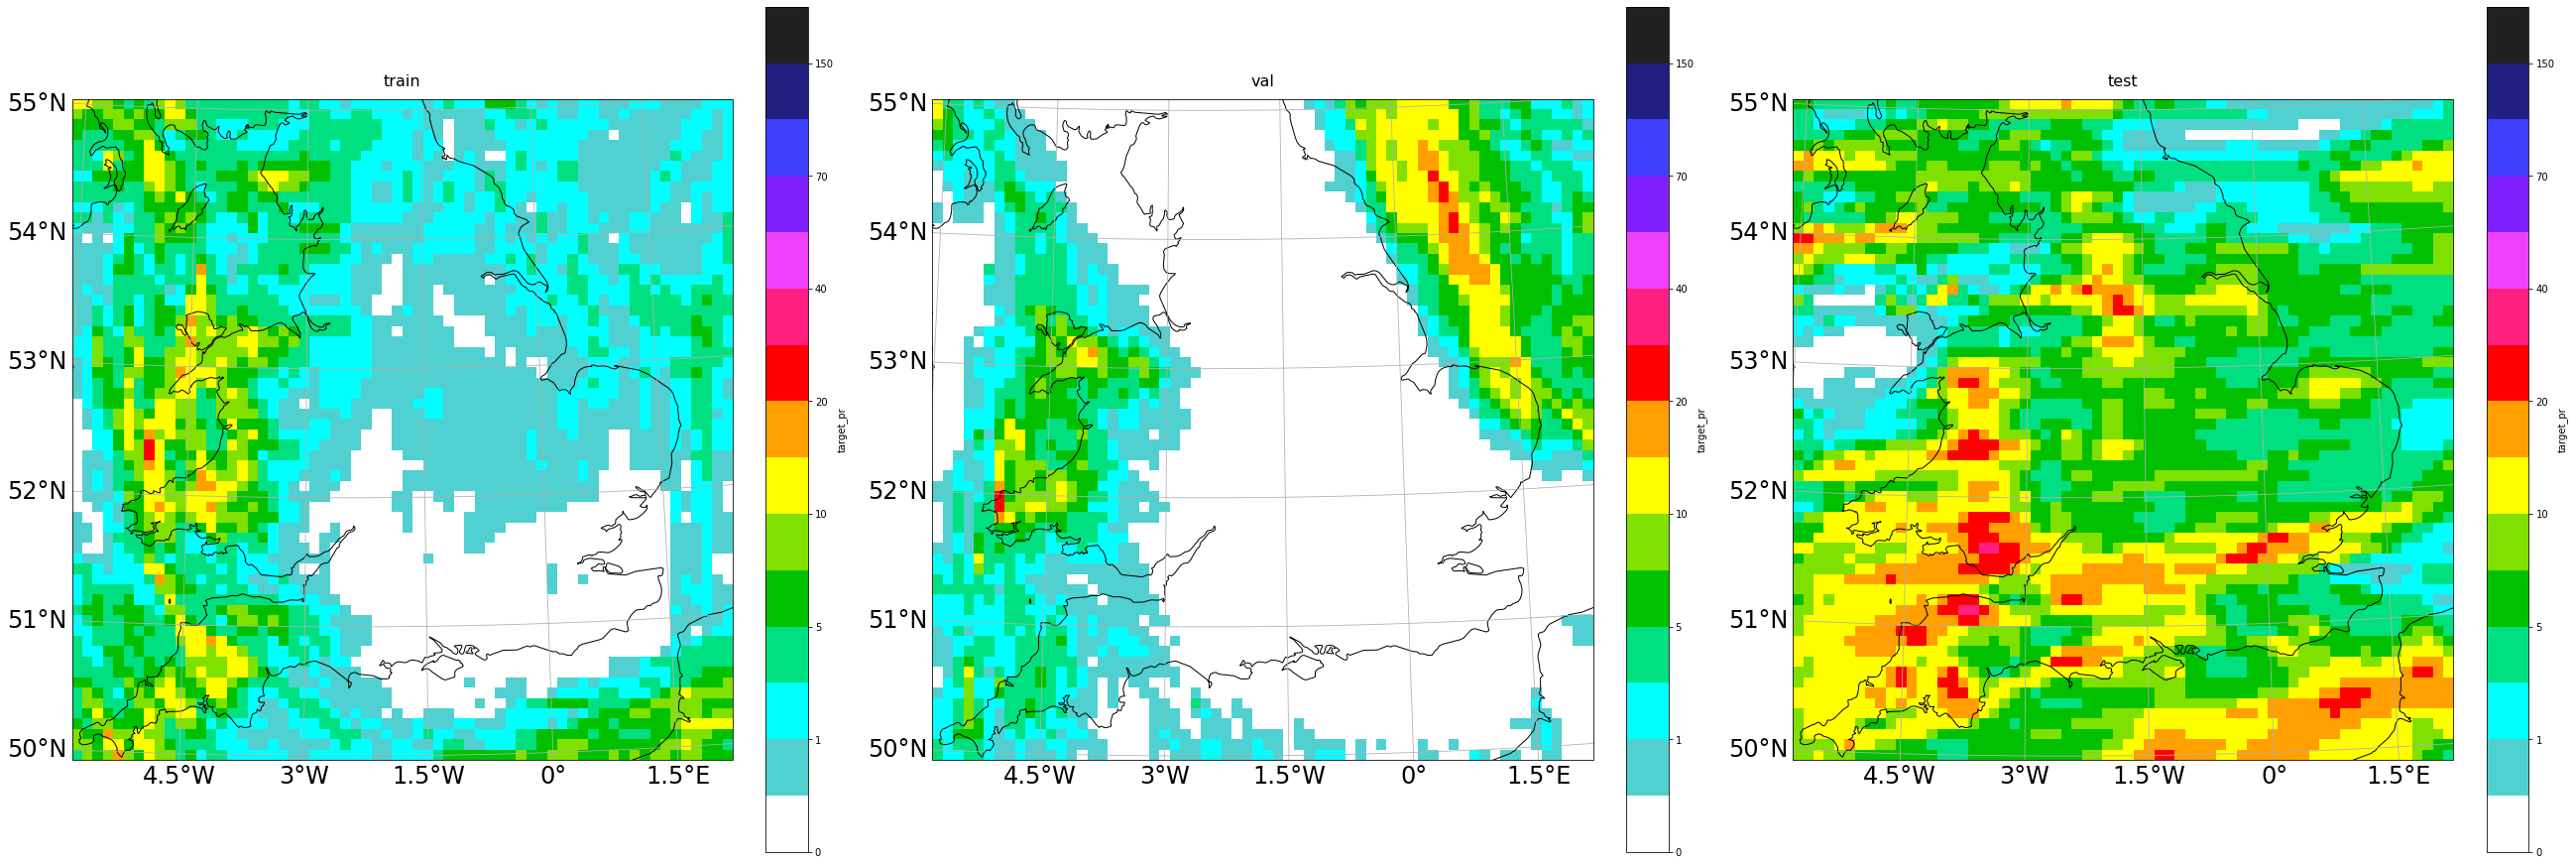

In [9]:
fig, axd = plt.subplot_mosaic([["train", "val", "test"]], figsize=(36, 12), constrained_layout=True, subplot_kw={'projection': cp_model_rotated_pole})
for split in ["train", "val", "test"]: 
    ax = axd[split]
    plot_grid(ds_splits[split]["target_pr"].isel(time=0), ax=ax, add_colorbar=True, style="precip", title=split)